### NOTE: Please do not change the file names when submit to Gradescope. 

# Task 1: Simulation of Linear Dynamical Systems

## Linear time invariant systems
To simulate the solution of a continuous-time linear dynamical system given the system matrix $A$ and initial condition $x_0$:

$\dot{x} = Ax, x(0) = x_0, $

you can use the matrix exponential formula to compute the state transition matrix and then use it to evolve the system over time. 

## Submission
Please fill the **TODO**s in the function contained in **Q1_student.py** and submit the file to gradescope.

You are supposed to compute:

1. The eigenvalues of the continuous time system; 
2. The eigenvalues of the discretie time system;
3. The the discretized state transition matrix;
4. The trajectory of the system, i.e. $x_1(t), x_2(2)$.

In [1]:
%load_ext autoreload
%autoreload 2
from Q1_sol import *
# from Q1_student import *

## Case 1: Unstable
The system matrix $A$ is given by:

$
A = \begin{bmatrix}
1 & 2 \\
-2 & 1 \\
\end{bmatrix}.
$

The system of equations can be written as:

\begin{align*}
\frac{dx_1}{dt} &= 1 \cdot x_1 + 2 \cdot x_2 \\
\frac{dx_2}{dt} &= -2 \cdot x_1 + 1 \cdot x_2 \\
\end{align*}

where $x_1$ and $x_2$ are the state variables, and the coefficients of the system matrix $A$ determine the dynamics of the system.


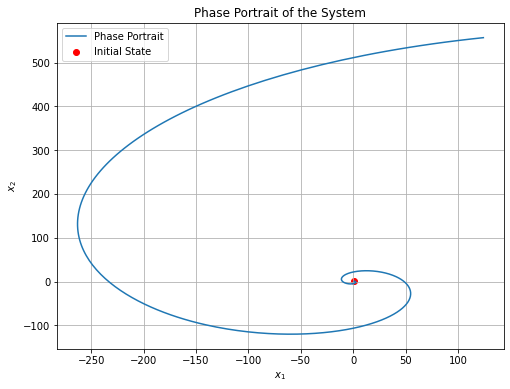

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system matrix A
A = np.array([[1, 2],
              [-2, 1]])

continuous_eigenvalues, discretized_eigenvalues, exp_A, x1_vals, x2_vals = linear_ode(A)

print("Continuous-time eigenvalues:", continuous_eigenvalues)
print("Discretized eigenvalues:", discretized_eigenvalues)

# Plot the phase portrait
plt.figure(figsize=(8, 6))
plt.plot(x1_vals, x2_vals, label="Phase Portrait")
plt.scatter(x1_vals[0], x2_vals[0], color='r', label="Initial State")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Phase Portrait of the System')
plt.legend()
plt.grid()
plt.show()

## Case 2: Stable
The system matrix $A$ is given by:

$
A = \begin{bmatrix}
0 & 1 \\
-1 & -1 \\
\end{bmatrix}
$

The system of equations can be written as:

\begin{align*}
\frac{dx_1}{dt} &= 0 \cdot x_1 + 1 \cdot x_2 \\
\frac{dx_2}{dt} &= -1 \cdot x_1 - 1 \cdot x_2 \\
\end{align*}

where $x_1$ and $x_2$ are the state variables, and the coefficients of the system matrix $A$ determine the dynamics of the system.

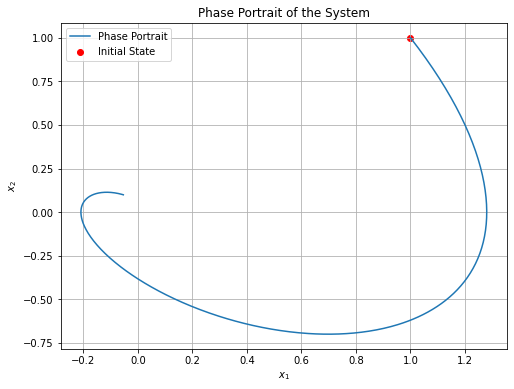

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system matrix A
A = np.array([[0, 1],
              [-1, -1]])

continuous_eigenvalues, discretized_eigenvalues, exp_A, x1_vals, x2_vals = linear_ode(A)

print("Continuous-time eigenvalues:", continuous_eigenvalues)
print("Discretized eigenvalues:", discretized_eigenvalues)

# Plot the phase portrait
plt.figure(figsize=(8, 6))
plt.plot(x1_vals, x2_vals, label="Phase Portrait")
plt.scatter(x1_vals[0], x2_vals[0], color='r', label="Initial State")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Phase Portrait of the System')
plt.legend()
plt.grid()
plt.show()

## Case 3: Limit Cycle
A limit cycle is a closed trajectory in a phase space that a dynamical system approaches and repeats over time.

The system matrix $A$ is given by:

$
A = \begin{bmatrix}
0 & 1 \\
-1 & 0 \\
\end{bmatrix}.
$

The system of equations can be written as:

\begin{align*}
\frac{dx_1}{dt} &= 0 \cdot x_1 + 1 \cdot x_2 \\
\frac{dx_2}{dt} &= -1 \cdot x_1 + 0 \cdot x_2 \\
\end{align*}

where $x_1$ and $x_2$ are the state variables, and the coefficients of the system matrix $A$ determine the dynamics of the system.

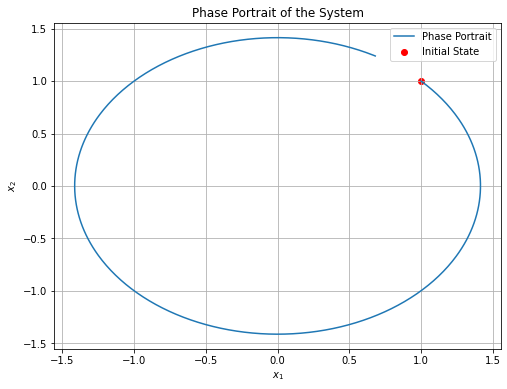

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system matrix A
A = np.array([[0, 1],
              [-1, 0]])

continuous_eigenvalues, discretized_eigenvalues, exp_A, x1_vals, x2_vals = linear_ode(A)

print("Continuous-time eigenvalues:", continuous_eigenvalues)
print("Discretized eigenvalues:", discretized_eigenvalues)

# Plot the phase portrait
plt.figure(figsize=(8, 6))
plt.plot(x1_vals, x2_vals, label="Phase Portrait")
plt.scatter(x1_vals[0], x2_vals[0], color='r', label="Initial State")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Phase Portrait of the System')
plt.legend()
plt.grid()
plt.show()

## Summary: Comparison of Unstable, Stable, and Limit Cycle Behaviors

### 1. Unstable Behavior
- **System Matrix:** $A = \begin{bmatrix} 1 & 2 \\ -2 & 1 \end{bmatrix}$
- **Description:** This case illustrates an unstable spiral behavior. The eigenvalues of the system matrix have a positive real part and complex conjugate imaginary parts. As a result, the system exhibits an outward spiral trajectory in the phase portrait, indicating divergence away from the origin over time.

### 2. Stable Linear Behavior
- **System Matrix:** $A = \begin{bmatrix} 0 & 1 \\ -1 & -1 \end{bmatrix}$
- **Description:** This example demonstrates stable linear behavior. The system matrix possesses eigenvalues with negative real parts, implying convergence to the origin. The phase portrait depicts a linear trajectory that converges toward the origin, representing a stable equilibrium point.

### 3. Limit Cycle Behavior
- **System Matrix:** $A = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$
- **Description:** In this scenario, the system exhibits limit cycle behavior. The system matrix's purely imaginary eigenvalues lead to a closed trajectory in the phase space. The state variables undergo circular motion, forming a stable closed loop that repeats periodically.

In summary, these examples demonstrate various behaviors displayed by linear dynamical systems, influenced by the eigenvalues of their system matrices. The eigenvalues fundamentally shape the system's dynamics and stability.


# Task 2: Simulation of Nonlinear System

## Kinematic point car model

The kinematic point car model is a simple representation for a vehicle kinematics at low speed, which can be expressed as follows with the variables:

$p_1, p_2$ : The position of the car in the global frame. Assume $x$ axis is the forward direction.

$v$ : The speed of the car along its longitudinal (forward) direction.

$\psi$ : The heading direction (yaw rate) of the car.

$\delta$ : The steering angle.

$a$ : linear acceleration.

$L$ : The wheelbase of the car (distance between the front and rear axles).

The equations of the bicycle model are given by:


\begin{align*}
\dot{p}_1 &= v \cos(\psi) \\
\dot{p}_2 &= v \sin(\psi) \\
\dot{\psi} &= \frac{v}{L} \tan(\delta) \\
\dot{v} &= a \\
\end{align*}

In the state space form, the model can be written as:

\begin{align*}
\dot{x} &= f(x, u)\\
\text{where,}\\
x &= [p_1, p_2, \psi, v]^T\\
u &= [\delta, a]\\
f(x,u) &= [\dot{p}_1, \dot{p}_2, \dot{\psi}, \dot{v}]^T\\
&= [v \cdot \cos(\psi), v \cdot \sin(\psi), \frac{v}{L} \cdot \tan(\delta), a]^T
\end{align*}

where $x = [p_1, p_2, \psi, v]^T$ is the state vector, $u = [\delta, a]$ is the control input vector, and $f(x, u) = [\dot{p}_1, \dot{p}_2, \dot{\psi}, \dot{v}]^T = [v \cdot \cos(\psi), v \cdot \sin(\psi), \frac{v}{L} \cdot \tan(\delta), a]^T$ is the system dynamics function.

Note: The dot above the variable denotes the derivative with respect to time, and (T) is the transpose of a vector.

## Submission
Please fill the **TODO**s in the function contained in **Q2_student.py** and submit the file to gradescope.

You are supposed to Complete:
1. the comtinuous time ODE of car model; 
2. the input field of **solve_ivp()**;
3. the integration steps of Euler method.

In [5]:
%load_ext autoreload
%autoreload 2
from Q2_sol import *
# from Q2_student import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Case 1: ODE solver with constant control input

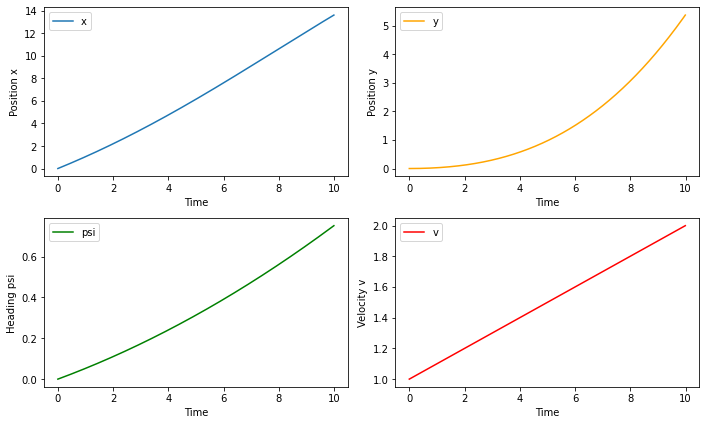

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

sol = sim_car()

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(sol.t, sol.y[0], label='x')
plt.xlabel('Time')
plt.ylabel('Position x')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(sol.t, sol.y[1], label='y', color='orange')
plt.xlabel('Time')
plt.ylabel('Position y')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(sol.t, sol.y[2], label='psi', color='green')
plt.xlabel('Time')
plt.ylabel('Heading psi')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(sol.t, sol.y[3], label='v', color='red')
plt.xlabel('Time')
plt.ylabel('Velocity v')
plt.legend()

plt.tight_layout()
plt.show()

## Case 2: ODE solver with time-varying control input

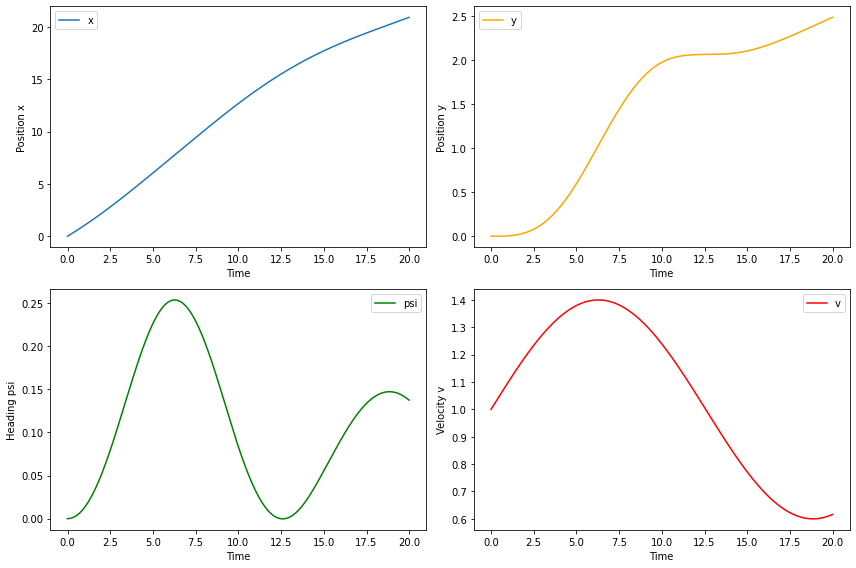

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

sol = sim_car_control()

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(sol.t, sol.y[0], label='x')
plt.xlabel('Time')
plt.ylabel('Position x')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(sol.t, sol.y[1], label='y', color='orange')
plt.xlabel('Time')
plt.ylabel('Position y')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(sol.t, sol.y[2], label='psi', color='green')
plt.xlabel('Time')
plt.ylabel('Heading psi')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(sol.t, sol.y[3], label='v', color='red')
plt.xlabel('Time')
plt.ylabel('Velocity v')
plt.legend()

plt.tight_layout()
plt.show()

## Case 3: Euler first order integration with time-varying control input

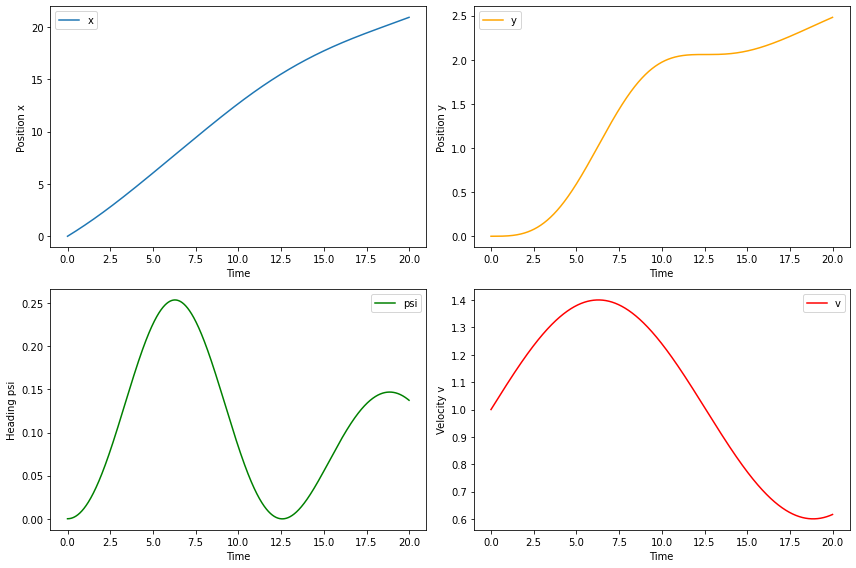

In [8]:
import numpy as np
import matplotlib.pyplot as plt

time, results =  sim_car_euler()

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(time, results[:, 0], label='x')
plt.xlabel('Time')
plt.ylabel('Position x')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(time, results[:, 1], label='y', color='orange')
plt.xlabel('Time')
plt.ylabel('Position y')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(time, results[:, 2], label='psi', color='green')
plt.xlabel('Time')
plt.ylabel('Heading psi')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(time, results[:, 3], label='v', color='red')
plt.xlabel('Time')
plt.ylabel('Velocity v')
plt.legend()

plt.tight_layout()
plt.show()